In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xlsxwriter

In [2]:
df = pd.read_csv(r'C:\Users\pahan\Desktop\Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [5]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [6]:
bins = [18,30,45,60,85]
labels = ['18-30', '31-45', '46-60', '61-85']

In [7]:
df['Age Category'] = pd.cut(df['Age'],bins,labels = labels)

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Category
0,1,Male,19,15000,39,Healthcare,1,4,18-30
1,2,Male,21,35000,81,Engineer,3,3,18-30
2,3,Female,20,86000,6,Engineer,1,1,18-30
3,4,Female,23,59000,77,Lawyer,0,2,18-30
4,5,Female,31,38000,40,Entertainment,2,6,31-45


In [9]:
df['Age Category'].value_counts()

61-85    480
31-45    328
46-60    305
18-30    263
Name: Age Category, dtype: int64

<AxesSubplot:>

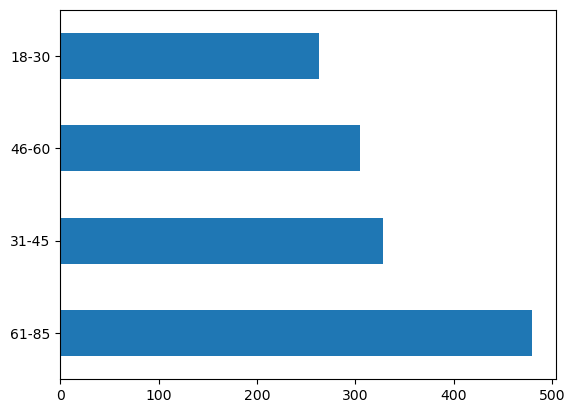

In [10]:
df['Age Category'].value_counts().plot(kind='barh')

In [11]:
df.isnull().sum()

CustomerID                  0
Gender                      0
Age                         0
Annual Income ($)           0
Spending Score (1-100)      0
Profession                 35
Work Experience             0
Family Size                 0
Age Category              624
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.head(500)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Category
0,1,Male,19,15000,39,Healthcare,1,4,18-30
1,2,Male,21,35000,81,Engineer,3,3,18-30
2,3,Female,20,86000,6,Engineer,1,1,18-30
3,4,Female,23,59000,77,Lawyer,0,2,18-30
4,5,Female,31,38000,40,Entertainment,2,6,31-45
...,...,...,...,...,...,...,...,...,...
669,670,Female,23,144916,84,Engineer,1,7,18-30
670,671,Male,54,59163,100,Marketing,3,3,46-60
672,673,Female,65,58318,45,Doctor,1,1,61-85
674,675,Male,71,84622,45,Doctor,0,6,61-85


In [14]:
df['Age Category'].value_counts()

61-85    470
31-45    326
46-60    299
18-30    257
Name: Age Category, dtype: int64

In [15]:
df1 = df[ df['Age Category'] == '18-30']

In [16]:
df2 = df[ df['Age Category'] == '31-45']

In [17]:
df3 = df[ df['Age Category'] == '46-60']

In [18]:
df4 = df[ df['Age Category'] == '61-85']

In [19]:
df1.max(axis = 'index')

CustomerID                     1995
Gender                         Male
Age                              30
Annual Income ($)            189650
Spending Score (1-100)          100
Profession                Marketing
Work Experience                  17
Family Size                       7
Age Category                  18-30
dtype: object

In [20]:
df1.min(axis = 'index')

CustomerID                     1
Gender                    Female
Age                           19
Annual Income ($)              0
Spending Score (1-100)         1
Profession                Artist
Work Experience                0
Family Size                    1
Age Category               18-30
dtype: object

In [21]:
df1.mean(axis = 'index')

C:\Users\pahan\AppData\Local\Temp\ipykernel_17520\3383881366.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean(axis = 'index')


CustomerID                   855.918288
Age                           24.354086
Annual Income ($)         103273.673152
Spending Score (1-100)        52.027237
Work Experience                4.007782
Family Size                    3.603113
dtype: float64

In [22]:
df1.median(axis = 'index')

C:\Users\pahan\AppData\Local\Temp\ipykernel_17520\2594641436.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.median(axis = 'index')


CustomerID                  829.0
Age                          24.0
Annual Income ($)         98000.0
Spending Score (1-100)       52.0
Work Experience               3.0
Family Size                   3.0
dtype: float64

In [24]:
with pd.ExcelWriter('output.xlsx') as writer:
    df1.to_excel(writer, sheet_name = 'Sheet_1')
    df2.to_excel(writer, sheet_name = 'Sheet_2')
    df3.to_excel(writer, sheet_name = 'Sheet_3')
    df4.to_excel(writer, sheet_name = 'Sheet_4')
    df.to_excel(writer, sheet_name = 'Sheet_5')

In [25]:
df4.mean(axis = 'index')

C:\Users\pahan\AppData\Local\Temp\ipykernel_17520\4108561867.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df4.mean(axis = 'index')


CustomerID                  1069.929787
Age                           73.002128
Annual Income ($)         112763.072340
Spending Score (1-100)        51.119149
Work Experience                4.076596
Family Size                    3.829787
dtype: float64

In [26]:
df9 = df4[ df4['Gender'] == 'Male']

In [27]:
df10 = df4[ df4['Gender'] == 'Female']

In [28]:
df9

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Category
8,9,Male,64,97000,3,Engineer,0,3,61-85
10,11,Male,67,7000,14,Engineer,1,3,61-85
57,58,Male,69,8000,46,Doctor,8,2,61-85
60,61,Male,70,84000,56,Artist,0,2,61-85
64,65,Male,63,63000,51,Lawyer,7,2,61-85
...,...,...,...,...,...,...,...,...,...
1964,1965,Male,61,182176,96,Artist,9,5,61-85
1966,1967,Male,65,134213,32,Homemaker,8,4,61-85
1978,1979,Male,84,104589,85,Artist,10,2,61-85
1987,1988,Male,63,59244,80,Artist,7,1,61-85


In [29]:
df10

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Category
40,41,Female,65,25000,35,Artist,4,1,61-85
62,63,Female,67,50000,52,Lawyer,0,3,61-85
67,68,Female,68,82000,48,Artist,8,4,61-85
90,91,Female,68,46000,55,Entertainment,0,3,61-85
106,107,Female,66,43000,50,Homemaker,3,2,61-85
...,...,...,...,...,...,...,...,...,...
1967,1968,Female,84,115580,73,Entertainment,8,5,61-85
1968,1969,Female,76,124034,88,Executive,10,2,61-85
1981,1982,Female,62,149797,19,Artist,5,6,61-85
1993,1994,Female,64,175254,100,Artist,9,5,61-85


In [30]:
df4

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Category
8,9,Male,64,97000,3,Engineer,0,3,61-85
10,11,Male,67,7000,14,Engineer,1,3,61-85
40,41,Female,65,25000,35,Artist,4,1,61-85
57,58,Male,69,8000,46,Doctor,8,2,61-85
60,61,Male,70,84000,56,Artist,0,2,61-85
...,...,...,...,...,...,...,...,...,...
1981,1982,Female,62,149797,19,Artist,5,6,61-85
1987,1988,Male,63,59244,80,Artist,7,1,61-85
1993,1994,Female,64,175254,100,Artist,9,5,61-85
1995,1996,Female,71,184387,40,Artist,8,7,61-85


In [31]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Category
0,1,Male,19,15000,39,Healthcare,1,4,18-30
1,2,Male,21,35000,81,Engineer,3,3,18-30
2,3,Female,20,86000,6,Engineer,1,1,18-30
3,4,Female,23,59000,77,Lawyer,0,2,18-30
4,5,Female,31,38000,40,Entertainment,2,6,31-45
...,...,...,...,...,...,...,...,...,...
1990,1991,Female,30,166983,69,Artist,7,3,18-30
1993,1994,Female,64,175254,100,Artist,9,5,61-85
1994,1995,Female,19,54121,89,Engineer,6,3,18-30
1995,1996,Female,71,184387,40,Artist,8,7,61-85
